<img src="data/images/Synergic_logo.png">

# PROYECTO FINAL
El objetivo de este proyecto es resolver un caso práctico en el cual una plataforma de aprendizaje en línea desea ofertar nuevos cursos para que lo que necesita saber:
- Qué tecnologías o lenguajes de programación son populares.
- En qué idiomas ha de ofertar dichos cursos.
- En qué países

Para ello se dispone de un dataset de Stack Overflow que contiene las palabras clave de las consultas entre los años 2008 y 2017. A parte de ello, y como el cliente necesita saber las tendencias tecnológicas más actuales, se realizará una captura de mensajes de Twitter para poder responder a las necesidades del mismo de una manera más precisa.

El equipo está formado por:
- **Jordi Molinera Poblet**
- **Yassine Belbachir**
- **Marcelino Camacho Paz**

# 0. Requisitos para ejecutar correctamente este notebook

Para ejecutar correctamente todo el código de este notebook, se re quiere la instalación de las siguientess instalar las siguientes librerías.
- ipywidgets. https://ipywidgets.readthedocs.io/en/latest/user_install.html
- WordCloud. https://github.com/amueller/word_cloud
- folium. https://folium.readthedocs.io/en/latest/installing.html

Así mismo, se recomienda la instalación de la extensión de Jupyter Notebook, Jupyter Dashboard, y el uso del "Report Layout" para una visualización más limpia.
https://github.com/jupyter/dashboards

# 1. Carga de datos

A continuación se va a proceder a la carga de los datos obtenidos a partir de los procesos de ingesta y transformación.

Estos datos se han almacenado de forma local en archivos CSV para facilitar su manipulación, portabilidad, representación y, al ser archivos de un tamaños pequeño, no supone ningún problema su procesado en cualquier equipo.

## 1.1. Datos de Stack Overflow

En las variables creadas a continuación se almacenan los datos convenientemente procesados de Stack Overflow.

In [1]:
import pandas as pd

#import sys
#reload(sys)
#sys.setdefaultencoding('utf-8')

# Variables globales
stack_overflow_results_path = "data/stack_overflow_results/"
numberOfResults = 10

# Tecnologías más populares del último año
popular_tags_2017_filename = 'list_popular_tags_2017.csv'
popular_tags_2017 = pd.read_csv(stack_overflow_results_path + popular_tags_2017_filename)

# Años y número de tags por año
years_and_tags_counts_filename = 'years_and_tags_counts.csv'
years_and_tags_counts = pd.read_csv(stack_overflow_results_path + years_and_tags_counts_filename)

# Tecnologías más populares por año
popular_tags_df = []
anno = 2008
for i in range(len(popular_tags_2017.tag)):
    popular_tags_filename = 'popular_tags_' + str(anno) +'.csv'
    popular_tags_df.append(pd.read_csv(stack_overflow_results_path + popular_tags_filename))
    anno +=1
    
# Evolución históricas de las tecnologías más populares del último año
historical_tags_df = []
rank = 1
for i in range(len(popular_tags_2017.tag)):
    popular_tags_2017_historical_filename = 'popular_tags_2017_rank_' + str(rank) +'_historical.csv'
    historical_tags_df.append(pd.read_csv(stack_overflow_results_path + popular_tags_2017_historical_filename))
    rank +=1
    
# Extracto de 20000 tags del 2017
tags_20K_2017_filename = 'tags_20K_2017.csv'
tags_20K_2017 = pd.read_csv(stack_overflow_results_path + tags_20K_2017_filename)

## 1.2. Datos de Twitter

En las variables creadas a continuación se almacenan los datos convenientemente procesados de Twitter.

In [2]:
# Variables globales
twitter_results_path = 'data/twitter_results/'

# Número de tweets
tweets_count_filename = 'tweets_count.csv'
with open(twitter_results_path + tweets_count_filename, 'r') as f:
    tweets_count = f.read()
    
# Tecnologías más populares Twitter
twitter_ranking_tags_filename = 'ranking_popular_tags.csv'
twitter_ranking_tags_df = pd.read_csv(twitter_results_path + twitter_ranking_tags_filename)
twitter_ranking_tags_df.replace('#r', 'r', inplace=True)

# Número de tweets con datos de país
number_tweets_with_country_filename = 'number_tweets_with_country.csv'
with open(twitter_results_path + number_tweets_with_country_filename, 'r') as f:
    number_tweets_with_country = f.read()

# Ranking de los países con más tweets
ranking_countries_filename = 'ranking_countries.csv'
ranking_countries_df = pd.read_csv(twitter_results_path + ranking_countries_filename)

# Ranking de los idiomas con más tweets
ranking_languages_filename = 'ranking_languages.csv'
ranking_languages_df = pd.read_csv(twitter_results_path + ranking_languages_filename)

# Ranking de los idiomas más empleados por tecnología
ranking_language_by_tag = []
rank = 1
for i in range(len(twitter_ranking_tags_df.Tag)):
    popular_languages_by_tag_rank_filename = 'popular_languages_by_tag_rank_' + str(rank) + '.csv'
    ranking_language_by_tag.append(pd.read_csv(twitter_results_path + popular_languages_by_tag_rank_filename))                                   
    rank +=1

# Tweets geolocalizados
geo_tweets_filename = 'geo_tweets.csv'
geo_tweets_df = pd.read_csv(twitter_results_path + geo_tweets_filename)

# 2. Tecnologías más populares

Para responder a la primera necesidad del cliente, primeramente se va a mostrar una histórico de las tecnologías más populares de los años que comprende la base de datos de Stack Overflow facilitada, para luego mostrar las tecnologías y lenguajes de programación más populares del úlitmo año y con ello mostrar las evolución de su popularidad a lo largo del tiempo.

## 2.1 Histórico de las tecnologías más populares entre 2008 y 2017

Las gráficas que se muestran en este apartado sirven de una primera toma de contacto con el problema que se plantea. 

En este epígrafe se prente introducir al cliente en el tema, ofreciéndole un filtrado y representación gráfica de datos que enriquezca su conocimiento sobre el mismo, para, a continuación, encauzar el flujo del documento hacia la respuesta hacia su primera pregunta, ¿cuáles son los lenguajes de programación o tecnologías más populares?

El gráfico posee una lista desplegable interactiva en la que se puede seleccionar el año del que se desea ver las información.

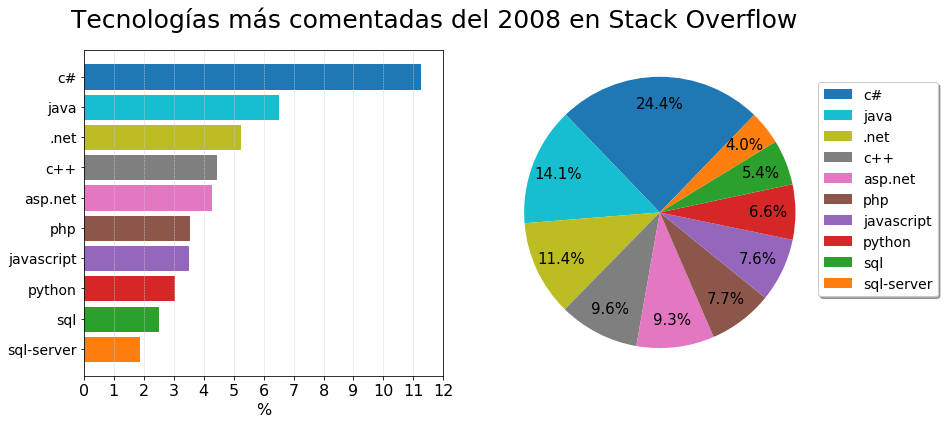

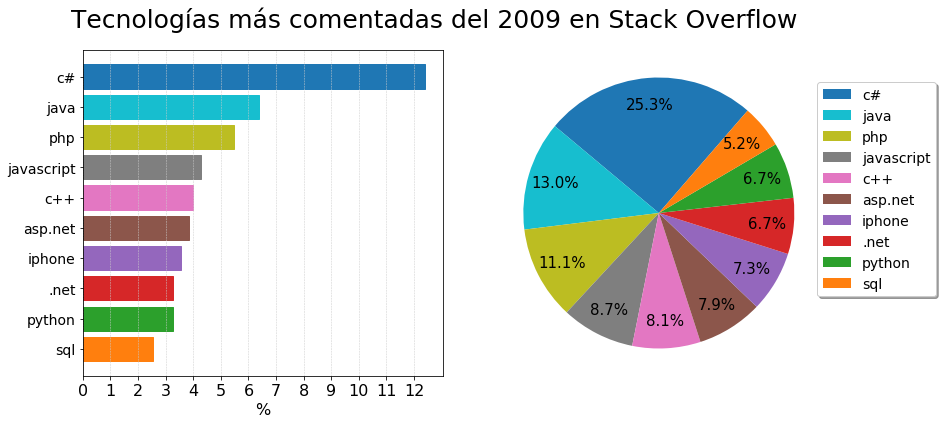

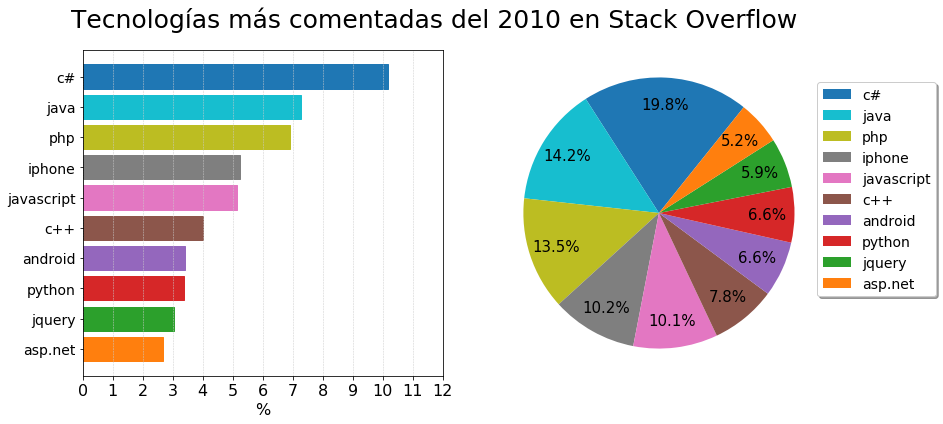

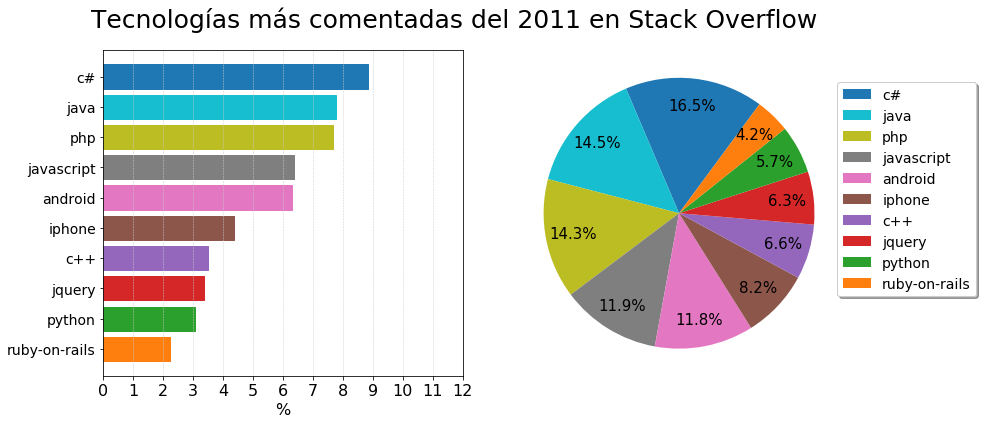

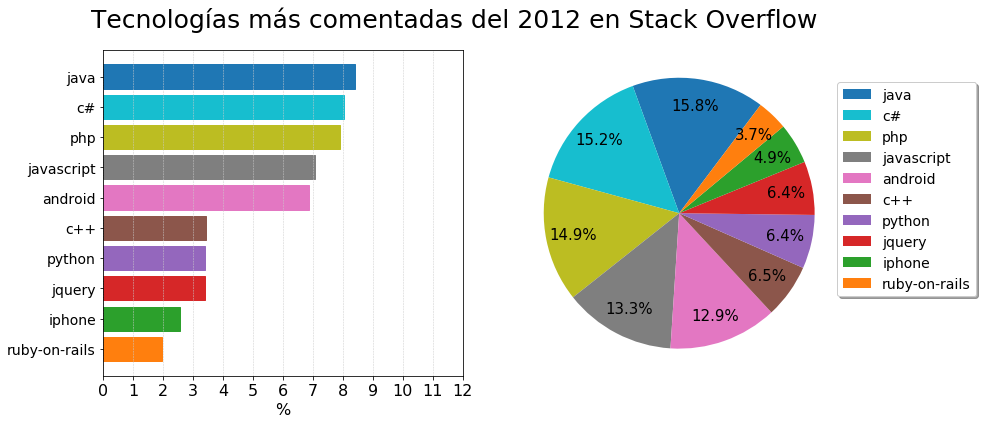

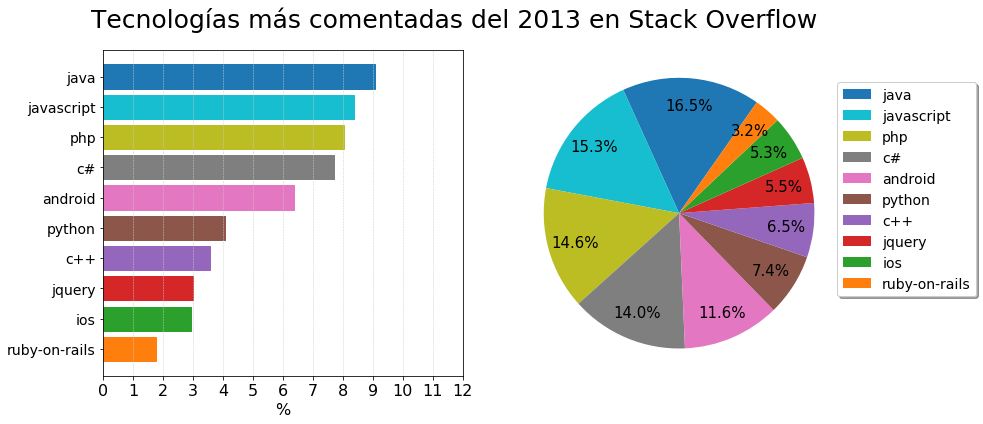

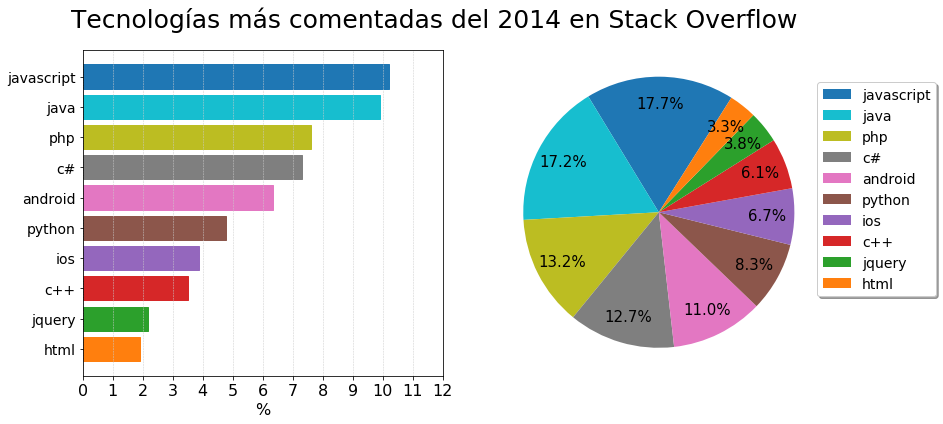

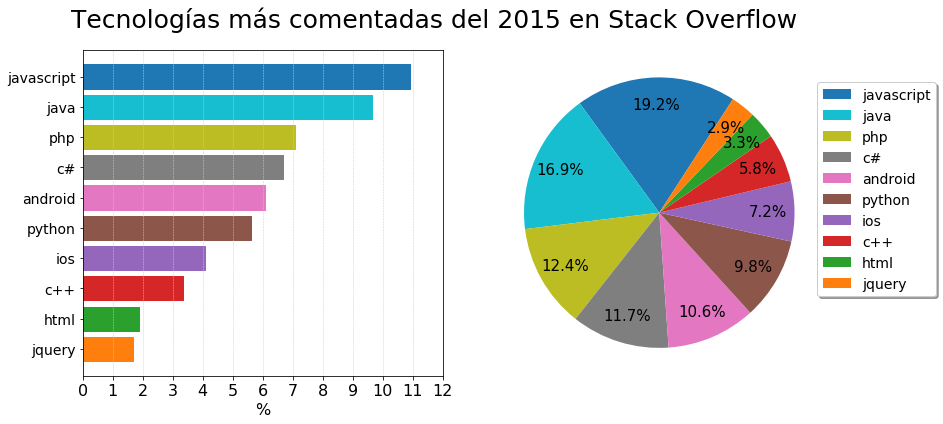

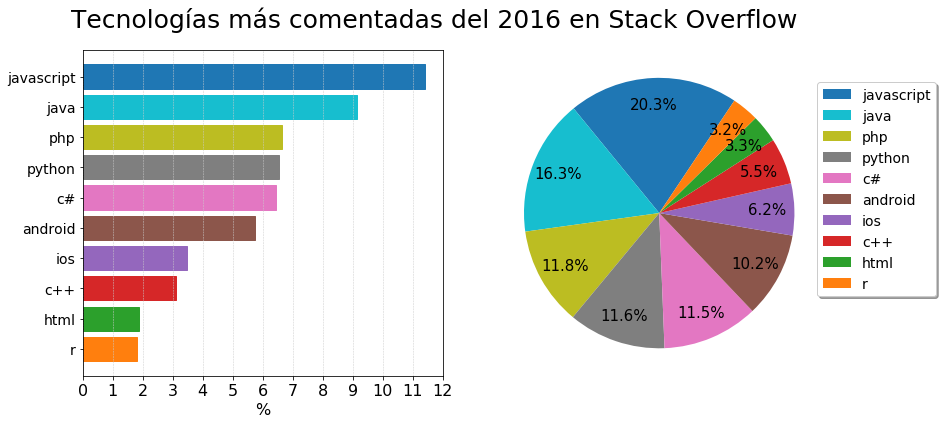

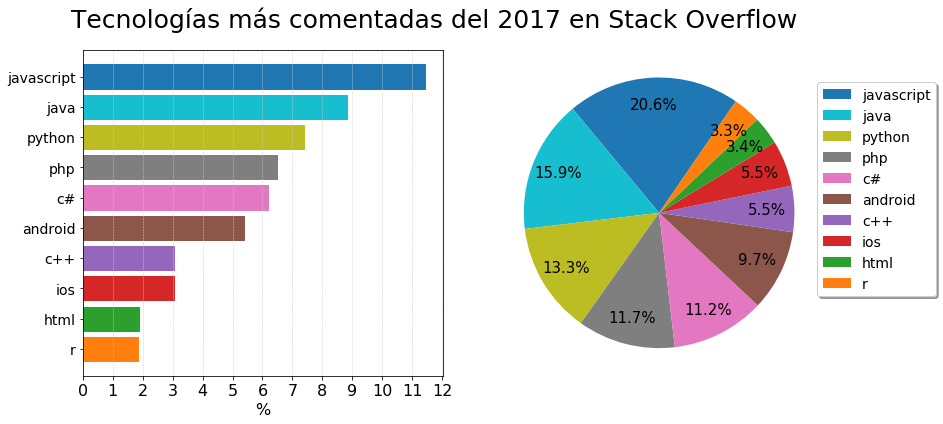

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

anyo = 2008
colors=['#1F77B4','#17BECF','#BCBD22','#7F7F7F','#E377C2','#8C564B','#9467BD','#D62728','#2CA02C','#FF7F0E']

for i in range(0,10):
    
    labels = popular_tags_df[i].tag
    # Gráfico
    f,axis = plt.subplots(1,2,gridspec_kw = {'width_ratios':[1.2, 1]})
    f.suptitle("Tecnologías más comentadas del "+str(2008+i)+" en Stack Overflow", fontsize = 25)
    f.set_figheight(6)
    f.set_figwidth(13)    
    barras = axis[0].barh(range(10),popular_tags_df[i].Promedio)
    for j in range(0,10):
        barras[j].set_color(colors[j])
        j=j+1
    
    axis[0].set_yticks(np.arange(0,10))
    axis[0].set_yticklabels(labels, fontsize=14)
    axis[0].set_xlabel("%",fontsize =16)
    axis[0].invert_yaxis()
    axis[0].set_xticks(np.arange(0,13,1))
    axis[0].set_xticklabels(np.arange(0,101,1), fontsize = 16)
    axis[0].xaxis.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=0.5)
    
    # plt.pie
    axis[1].pie(
        popular_tags_df[i].Promedio,
        autopct='%1.1f%%',
        shadow=False, 
        colors=colors, 
        startangle=sum(popular_tags_df[i].Promedio),
        pctdistance=0.8,
        textprops={"fontsize":15},
        radius=20)
    
    #plt.pie
    axis[1].legend(labels,fontsize = 14,bbox_to_anchor=(1.03, 0.9), loc=2, borderaxespad=0., fancybox=True, shadow=True)
    axis[1].axis('equal')
    plt.show()    
    i=i+1

### 2.1.1 Nube de palabras de las tecnologías más populares del 2017 en Stack Overflow

Una vez que se han obtenido cuales son las tecnologías o lenguajes de programación más populares del 2017, se ha considerado mostrar dicha información de una manera más visual si cabe, mediante una nube de palabras.

El tamaño de cada palabra representa el número de menciones que tuvo en los comentarios en el año 2017 dicha tecnología.

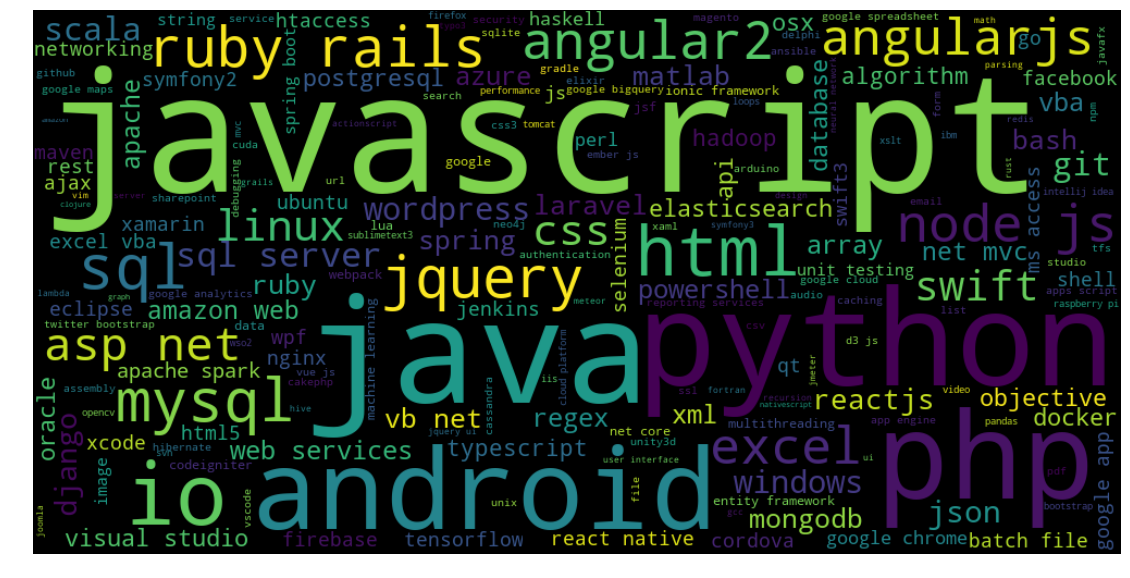

In [4]:
%matplotlib inline 

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % np.random.randint(10, 40)

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
import numpy as np

wordcloud = (WordCloud(stopwords=STOPWORDS, background_color='black', width=1000, height=500)
             .generate(" ".join(tags_20K_2017.tag)))

plt.figure(figsize=(25,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### 2.1.2. Evolución histórica de las tecnologías más populares del 2017

De no demasiado sirve conocer las popularidad de una tecnología si no se conoce su tendencial temporal, mediante la cual se puede comprender si ésta está en alza o en declive.

Para ello se ha realizado una gráfica que representa la evolución entre los años 2008 y 2017 de las tecnologías que fueron más mencionadas en el último año en Stack Overflow.

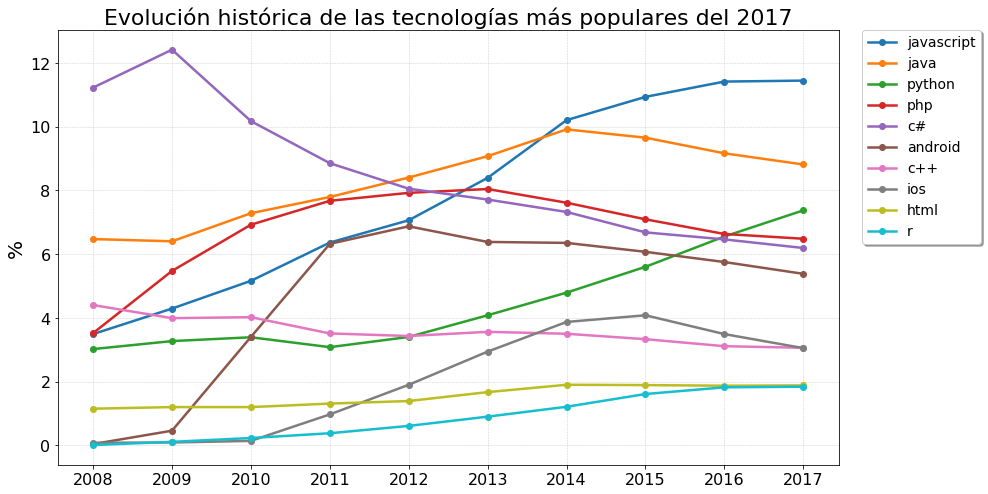

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

fig, axis = plt.subplots(1,1)
fig.set_size_inches(14,8)
for i in range(len(popular_tags_2017)):
    (axis.plot(historical_tags_df[i].year,historical_tags_df[i].Promedio, 
               label = popular_tags_2017.tag[i], linewidth=2.5, linestyle='-', marker='o'))
    plt.hold    
axis.set_title('Evolución histórica de las tecnologías más populares del 2017', fontsize = 22)
axis.set_xticks(years_and_tags_counts.year)
axis.yaxis.grid()
axis.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=0.5)
axis.set_xticklabels(years_and_tags_counts.year, rotation='horizontal', fontsize=16)
axis.set_ylabel("%",fontsize =20)
plt.yticks(fontsize =16)
axis.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0., fancybox=True, shadow=True, fontsize = 14);


A partir de la visualización de esta gráfica se puede llegar a la conclusión de por popularidad y tendencia al alza sería, a priori, posiblemente realizar cursos de:
- **Javascript**
- **Python**

No obstante, y a pesar de su ligera tendencia negativa probablemente también sería oportuno realizar cursos de **Java**.

Más adelante se irá ofreciendo unos resultados más precisos.

## 2.2 Tecnologías más comentadas en la actualidad

Como ya se ha comentado, se ha realizado una captura de tweets para obtener la popularidad actual de las tecnologías y lenguajes de programación más populares del año pasado.

Dicha captura ha prendido obtener una muestra real global, por lo que se han capturado tweets durante 10 minutos cada hora durante 2 días laborables. Con esto nos hemos asegurado que ninguna región del planeta quedara fuera de nuestro espectro.

### 2.2.1 Número de tweets capturados

Como se va a hablar en términos de porcentajes no de valores absolutos, se ha creído conveniente indicar el número de tweets capturados para que este dato esté presente durante los análisis que se van a realizar a posteri.

In [6]:
from IPython.display import display, HTML

HTML(('<font size="4" color="424242">Se han capturado  </font><strong><font size="5" color="FF8C00">{}</font></strong><font size="4" color="424242"> tweets.</font>')
     .format(tweets_count))

### 2.2.2 Ranking de las últimas tendencias en tecnología en Twitter

Con los datos capturados de Twitter filtrados por las tecnologías y lenguajes de programación más populares del año pasado se han obtenido los resultados a continuación mostrados.

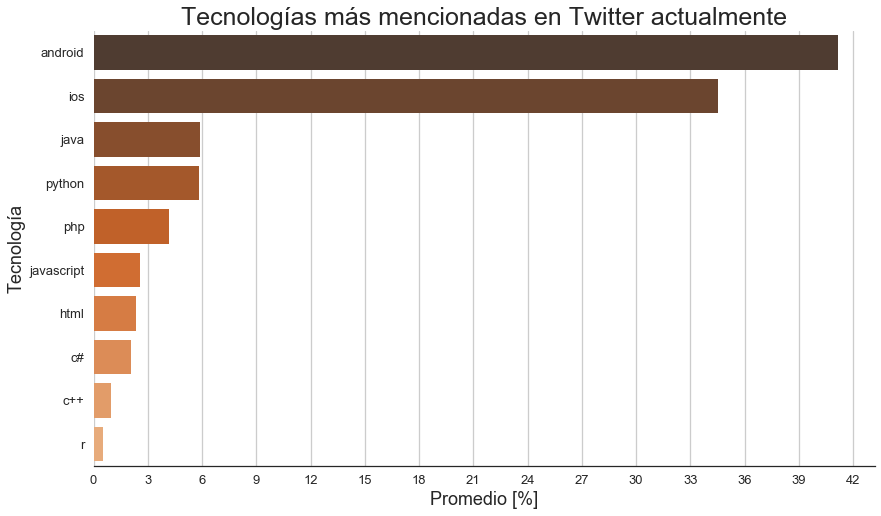

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context="talk")


f, ax = plt.subplots(1, 1, figsize=(14, 8))

# Generate some sequential data
sns.barplot(twitter_ranking_tags_df.Promedio, twitter_ranking_tags_df.Tag, palette="Oranges_d", ax=ax, orient='h')
ax.set_xlabel('Promedio [%]', fontsize = 18)
ax.xaxis.grid()
ax.set_xticks(np.arange(0,45,3))
ax.set_title('Tecnologías más mencionadas en Twitter actualmente', fontsize = 25)
#ax.set_xlabel()
ax.set_ylabel('Tecnología', fontsize = 18)

# Finalize the plot
sns.despine(left=True)

Como se ha observado, el promedio de los tweets relacionados con las tecnologías y lenguajes de programación más populares del 2017 han sido copados por **Android** y **ios**.

Dado que el enfoque de Twitter, a diferencia de Stack Overflow, no es sólo de carácter tecnológico sino más bien generalista, estos resultados hay que analizarlos de una manera más concienzuda.

Ejemplificando, en Twitter una persona puede comentar que se han comprado un nuevo móvil con Android, no significando que ésta esté interesada en formarse de alguna manera en esta tecnología.

Por ello, y a priori, creemos que quizá Twitter no sea una buena herramienta para tomar una decisión absoluta en base a lo que el cliente requiere, pero sí que puede ser un buen complemento una vez analizados los resultados, ya que a parte del "reinado" de Android y ios en el número de menciones, el resto de las tecnologías sí que se cree que pueden estar bien representadas en el usuario objeto de un posible curso en línea.

In [8]:
twitter_ranking_tags_df.style.bar(subset=['Promedio'],align= 'left', color=['#FF8C00']).set_table_styles([
    {'selector': '.row_heading, .blank', 'props': [('display', 'none;')]}])

,Tag,Menciones,Promedio
0,android,13803,41.14
1,ios,11591,34.55
2,java,1979,5.9
3,python,1951,5.82
4,php,1394,4.15
5,javascript,854,2.55
6,html,786,2.34
7,c#,690,2.06
8,c++,322,0.96
9,r,181,0.54


### 2.2.3 Comparativa entre las tecnologías más populares del 2017 y las actuales

Se ha prendido realizar una comparativa entre las tecnologías más populares del 2017, en base a Stack Overflow y a lo obtenido a través de Twitter.

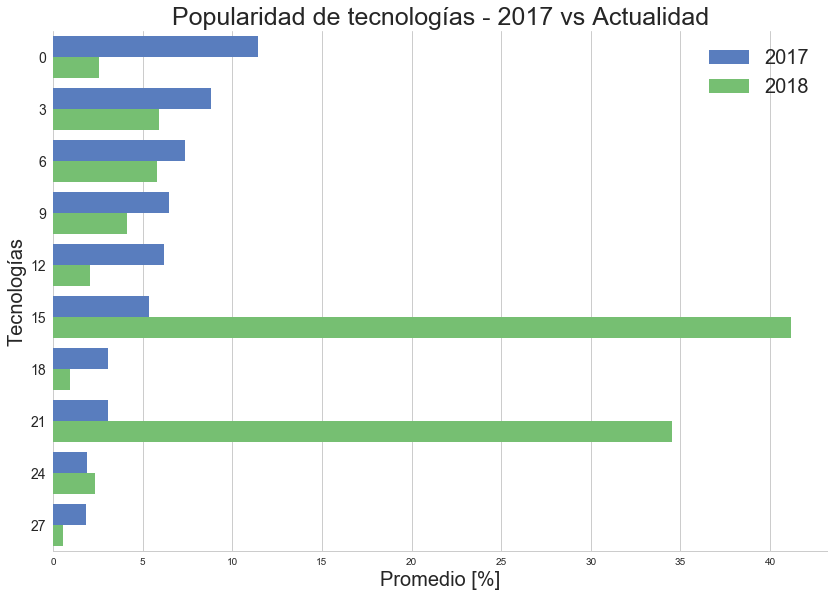

In [9]:
import seaborn as sns
sns.set(style="whitegrid")

tags_2017 = popular_tags_df[9].copy()
tags_2017['year']='2017'
tags_2017.columns = ['Tag', 'Menciones', 'Promedio', 'Year']
tags_2018 = twitter_ranking_tags_df.copy()
tags_2018['Year']='2018'
tags_2017_2018 = pd.concat([tags_2017, tags_2018], ignore_index=True)

g = sns.factorplot(x="Promedio", y="Tag", hue="Year", data=tags_2017_2018,
                   size=8, aspect = 1.5, kind="bar", palette="muted", orient='h', legend=False);
g.despine(left=True);
#g.get_xticklabels()
g.set_ylabels("Tecnologías",fontsize = 20);
g.set_xlabels("Promedio [%]",fontsize = 20);
#g.ax.set_xticks(np.arange(0,70,3))
#g.ax.set_xticklabels(g.ax.get_xticklabels(), fontsize=14);
g.ax.set_yticklabels(np.arange(0,70,3), fontsize=14);
g.ax.legend(fontsize = 20,fancybox=True, shadow=True, loc='best');
g.ax.set_title('Popularidad de tecnologías - 2017 vs Actualidad', fontsize = 25);


Como se ha mentado en el apartado anterior, estos resultados están "adulterados", ya que no incluyen sólo a gente interesada en la tecnología, sino también a no posibles clientes potenciales; de ahí la enorme diferencia que presentan **Android** y **ios** con respecto a su popularidad en Stack Overflow el año pasado.

A pesar de ello, se puede concluir que **Java** y **Python** también podrías ser muy buenos candidatos para impartir cursos formativos online, ya que a pesar de que Android y ios son palabras mucho más populares en el lenguaje común, éstos han obtenido unos porcentajes de menciones bastante elevados.

Con todo esto, **se proponen** los siguientes lenguajes y tecnologías para impartir cursos en línea:
- **Android**
- **ios**
- **Java**
- **Python**

# 3. Idiomas empleados al hablar sobre estas tecnologías

A continuación, se iniciará el análisis de los idiomas más empleados al comentar sobre las tecnologías y lenguajes de programación más populares en la muestra de datos obtenida de Twitter.

## 3.1 Ránking de Idiomas más empleados

Mediante la información proporcionada en cada uno de los tweets obtenidos, se ha determinado el idioma de cada uno de ellos, y se ha realizado una gráfica en la que se muestra el promedio de uso de los diez más usados.

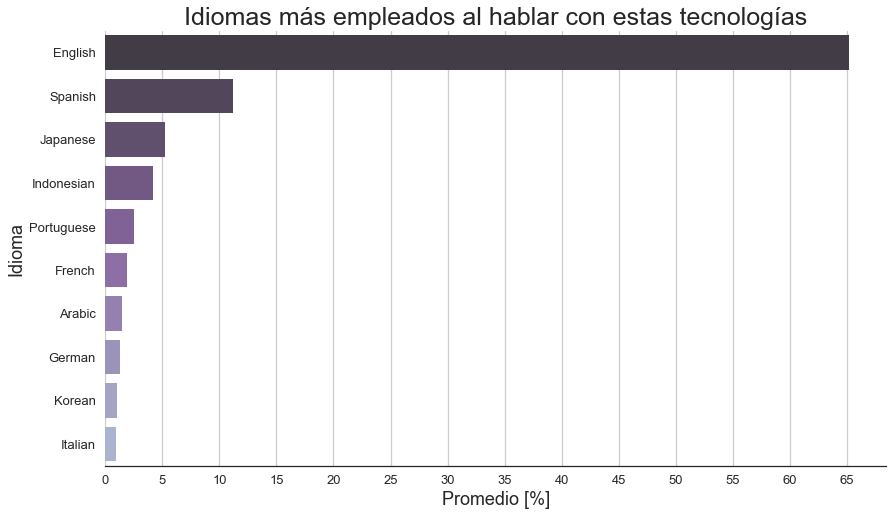

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context="talk")


f, ax = plt.subplots(1, 1, figsize=(14, 8))

# Generate some sequential data
sns.barplot(ranking_languages_df.Promedio, ranking_languages_df.Language, palette="BuPu_d", ax=ax, orient='h')
ax.set_xlabel('Promedio [%]', fontsize = 18)
ax.xaxis.grid()
ax.set_xticks(np.arange(0,70,5))
ax.set_title('Idiomas más empleados al hablar con estas tecnologías', fontsize = 25)
#ax.set_xlabel()
ax.set_ylabel('Idioma', fontsize = 18)

# Finalize the plot
sns.despine(left=True)

Los resultados son claros, el **inglés** es el idioma más empleado por los usuarios que comentan sobre tecnologías o lenguajes de programación.

El **español** no es una sorpresa que esté en segundo lugar ya que es el tercer idioma más hablado del mundo y es logico que también se emplee en estos ámbitos.

Pero sí que se cree que es digno de comentar el tercer y cuarto puesto del **japonés** y el **indonesio**, que pudiera ser por el hecho de que el uso de Twitter sea muy popular en esos países.

## 3.2 Mapa de calor. Idiomas y tecnologías

Se ha creído oportuno realizar un "mapa de calor" que relacione el idioma y las tecnologías populares con su número de menciones, para una visualización rápida y eficaz de los datos obtenidos.

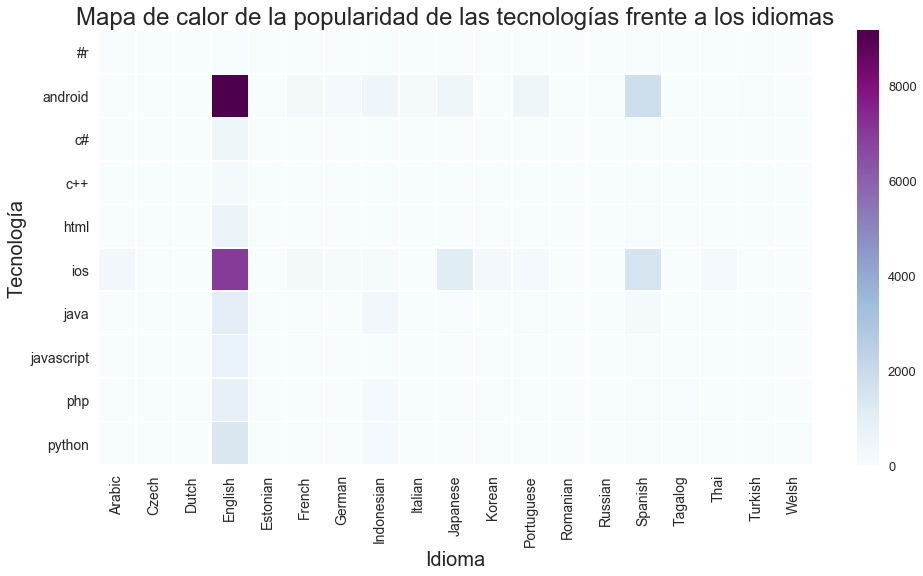

In [11]:
import seaborn as sns

heatmap_df = pd.concat(ranking_language_by_tag, ignore_index=True)
tmp_heatmap_matrix = heatmap_df.pivot("Tecnologia", "Language", "Menciones")
heatmap_matrix = tmp_heatmap_matrix.fillna(0).astype(int)

fig = plt.figure(figsize=(16,8))
r = sns.heatmap(heatmap_matrix, cmap='BuPu',linewidths=.5)
r.set_title("Mapa de calor de la popularidad de las tecnologías frente a los idiomas", fontsize = 24)
r.set_ylabel("Tecnología",fontsize = 20)
r.set_xlabel("Idioma",fontsize = 20)
r.set_xticklabels(r.get_xticklabels(), rotation='vertical', fontsize=14);
r.set_yticklabels(r.get_yticklabels(), rotation='horizontal',fontsize=14);

En este mapa se puede observar lo ya comentado, que **Android** y **ios** en lengua inglesa copan una buena parte de las menciones en Twitter.

## 3.3 Promedio del idioma empleado por tecnología

En este apartado se ha realizado un gráfico de barras que muestra el promedio de las menciones sobre tecnología por cada idioma. Se ha aplicado un filtrado para obtener sólo los resultados que pudieran ser algo significativos.

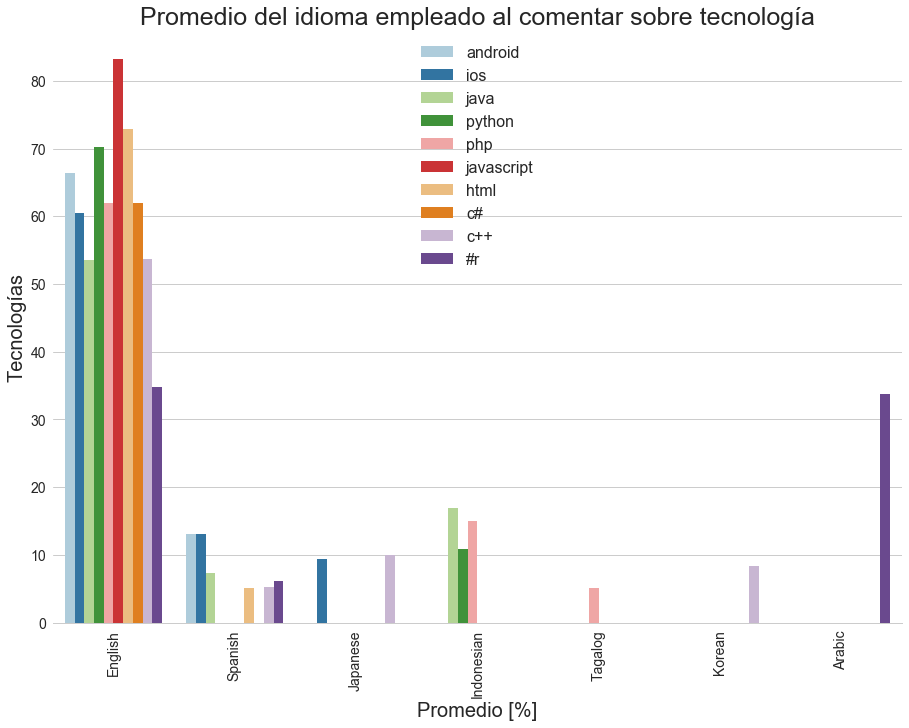

In [12]:
import seaborn as sns

languages_chart_df = pd.concat(ranking_language_by_tag, ignore_index=True)
languages_chart_df = languages_chart_df[languages_chart_df.PromedioTag > 5]

sns.set(style="whitegrid")

g = sns.factorplot(y="PromedioTag", x="Language", hue="Tecnologia", data=languages_chart_df,
                   size=9, aspect = 1.4, kind="bar", palette="Paired", orient='v', legend=False);
g.despine(left=True);
g.set_ylabels("Tecnologías",fontsize = 20);
g.set_xlabels("Promedio [%]",fontsize = 20);
g.ax.set_xticklabels(g.ax.get_xticklabels(), fontsize=14,rotation='vertical');
g.ax.set_yticklabels(g.ax.get_yticklabels(), fontsize=14);
g.ax.legend(fontsize = 16,fancybox=True, shadow=True, loc='best');
g.ax.set_title('Promedio del idioma empleado al comentar sobre tecnología', fontsize = 25);

Como ya se había visto, la lengua inglesa acapara casi todas las menciones tecnológicas.

Cabe destacar que el **árabe** copa un buen porcentaje de los comentarios sobre **R** y que el **indonés** es un idioma fuerte en ámbitos de **Python** y **PHP**. A priori pudiera parecer que también lo es en **Java**, pero quizá sea por ser Java el nombre de un **isla** del país.

A parte de ello, también se quiere comentar el uso de **C++** en idiomas **japonés** y **coreano**, así como la presencia del idioma filipino **tágalo** en la gráfica.

## 3.4 Promedio de cada tecnología en los dos principales idiomas

Como se ha observado, los idiomas **inglés** y **español** son los más empleados en cuestiones de tecnología, por ello se ha realizado una nueva gráfica de barras que muestre el espectro de las tecnologías y lenguajes de programación en cada uno de los dos idiomas.

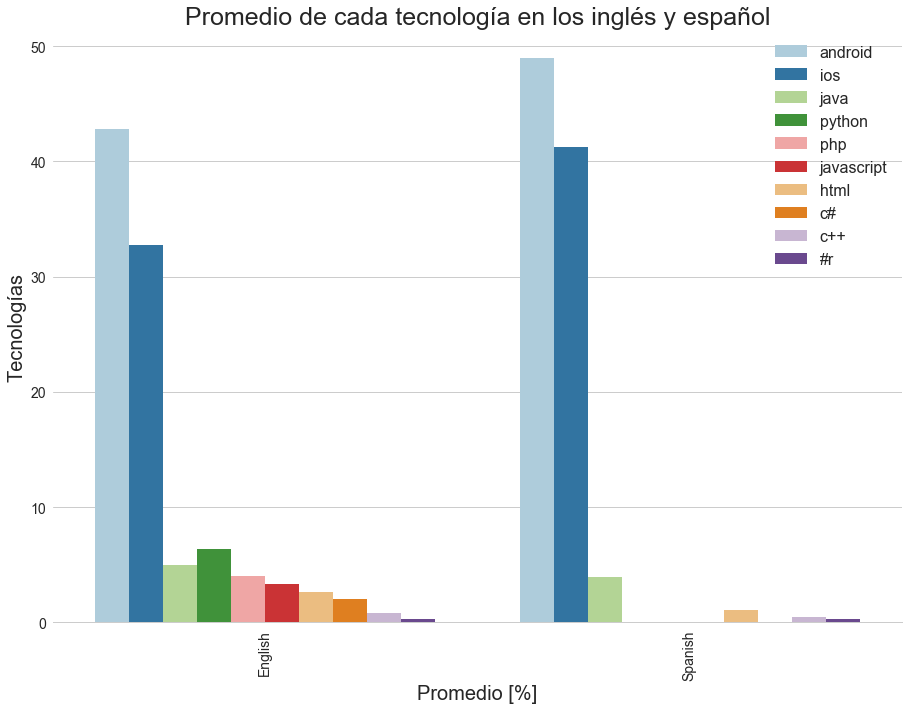

In [13]:
import seaborn as sns

main_languages_chart_df = pd.concat(ranking_language_by_tag, ignore_index=True)
main_languages_chart_df = languages_chart_df[(languages_chart_df.Language == 'English') | (languages_chart_df.Language == 'Spanish')]

sns.set(style="whitegrid")

g = sns.factorplot(y="PromedioIdioma", x="Language", hue="Tecnologia", data=main_languages_chart_df,
                   size=9, aspect = 1.4, kind="bar", palette="Paired", orient='v', legend=False);
g.despine(left=True);
g.set_ylabels("Tecnologías",fontsize = 20);
g.set_xlabels("Promedio [%]",fontsize = 20);
g.ax.set_xticklabels(g.ax.get_xticklabels(), fontsize=14,rotation='vertical');
g.ax.set_yticklabels(g.ax.get_yticklabels(), fontsize=14);
g.ax.legend(fontsize = 16,fancybox=True, shadow=True, loc='best');
g.ax.set_title('Promedio de cada tecnología en los inglés y español', fontsize = 25);

No hay ninguna novedad en lo ya analizado, en ambos idiomas dominan **Android** y **ios**, observándose, eso sí, que en el idioma **inglés** hay un **mayor reparto** de las menciones entre las diferentes tecnologías, posiblemente por el número de personas que están dedicadas o interesadas en el sector por parte de la gente de habla inglesa.

**Pyton** y **Java** han obtenido también buenos resultados en **inglés**.

# 4. Países desde los que más se habla sobre estas tecnologías

Se ha prentendido obtener los países desde donde se habla sobre estas tecnologías, ya que era un requisito del cliente.

In [14]:
HTML(('''<font size="4" color="424242">De los </font><strong>
         <font size="5" color="FF8C00">{}</font></strong>
         <font size="4" color="424242"> tweets, solo </font>
         <strong><font size="5" color="FF8C00">{}</font></strong>
         <font size="4" color="424242"> de ellos dispone de información sobre el país.</font>''')
     .format(tweets_count,number_tweets_with_country))

Sin embargo, como se aprecia por lo comentado una línea más arriba, no se han obtenido muchas capturas de tweets que incluyeran información sobre su locaclización, posiblemente por la reticencia de los usuarios a facilitar datos privados.

## 4.1. Ránking de países desde donde más se ha comentado sobre tecnología

A pesar de lo comentado, se ha realizado una gráfica en la que se puede observar desde dónde se ha comentado sobre tecnología o lenguajes de programación.

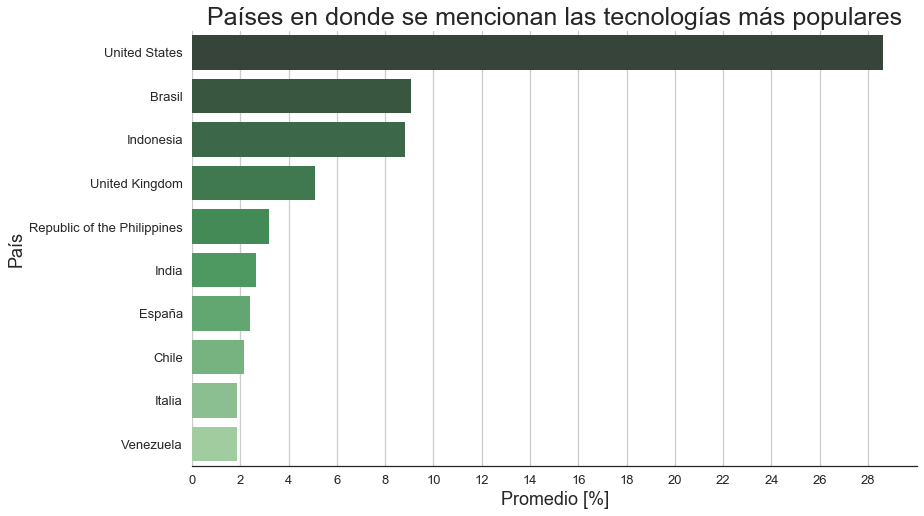

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context="talk")

f, ax = plt.subplots(1, 1, figsize=(13, 8))

# Generate some sequential data
sns.barplot(ranking_countries_df.Promedio, ranking_countries_df.Country, palette="Greens_d", ax=ax, orient='h')
ax.set_xlabel('Promedio [%]', fontsize = 18)
ax.xaxis.grid()
ax.set_xticks(np.arange(0,30,2))
ax.set_title('Países en donde se mencionan las tecnologías más populares', fontsize = 25)
#ax.set_xlabel()
ax.set_ylabel('País', fontsize = 18)

# Finalize the plot
sns.despine(left=True)

Por lo observado en la gráfica, los países sajones son menos recelosos a la hora de cuidar su privacidad, pero sorprende el hecho de que aparezca **Brasil** en la lista, ya que el portugués no destacaba como idioma más empleadosy sin embargo está en el segundo puesto del ránking por países.

Lo mismo sucede con **Indonesia** y **Filipinas**, gente de cuyos países parece no tener problema alguno con compartir los datos de su ubicación.

In [16]:
ranking_countries_df.style.bar(subset=['Promedio'],align= 'left', color=['#46C95A']).set_table_styles([
    {'selector': '.row_heading, .blank', 'props': [('display', 'none;')]}])

,Country,Menciones,Promedio
0,United States,107,28.61
1,Brasil,34,9.09
2,Indonesia,33,8.82
3,United Kingdom,19,5.08
4,Republic of the Philippines,12,3.21
5,India,10,2.67
6,España,9,2.41
7,Chile,8,2.14
8,Italia,7,1.87
9,Venezuela,7,1.87


## 4.2. Mapa de ubicaciones desde donde se han comentado una tecnología

A modo de colofón, se ha prentendido mostrar en una mapa los lugares desde donde un individio ha generado una mendición sobre tecnología, para tener una mejor herramienta de análisis.

Cada ubicación es de un color diferente según la tecnología sobre la que comenta. También se ha incluido la hora del día a la que ha realizado el comentario.

In [17]:
import folium

print(folium.__version__)

from folium.plugins import MarkerCluster

tag_color_dic = {'javascript':'pink',
                 'java':'red',
                'python':'darkpurple',
                'php':'beige',
                'c#':'gray',
                'android':'lightgreen',
                'c++':'blue',
                'ios':'white',
                'html':'darkred',
                'r':'gray'}

m = folium.Map(
    location=[30, 0],
    tiles='Stamen Toner',
    #tiles='Cartodb Positron',
    zoom_start=2
)

marker_cluster = MarkerCluster().add_to(m)

for i in range(len(geo_tweets_df)):
    folium.Marker(
        location=[geo_tweets_df.Latitude[i], geo_tweets_df.Longitude[i]],
        popup=geo_tweets_df.Tag[i]+' a las '+str(geo_tweets_df.Hour[i])+' horas.',
        icon=folium.Icon(color=tag_color_dic[geo_tweets_df.Tag[i]], icon=None),
    ).add_to(marker_cluster)
m

0.5.0


# 5. Conclusión

A partir de toda la información analizada se ha aconseja impartir los cursos en línea en las siguientes tecnologías, lenguajes de programación, idiomas y países. 

Creemos que no hemos podido recabar suficiente información sobre la geolocalización de los tweets para dictar una sentencia sobre los países donde impartir los cursos, no obstante, se va a presuponer que los porcentajes de países que hablan sobre estas tecnologías se mantendría constante al incrementar el número de tweets geolocalizados.

## 5.1 Tecnologías y lenguajes de programación

Se aconseja impartir cursos formativos en línea de:
- **Android**
- **ios**
- **Python**
- **Java**
- **Javascript**

## 5.2 Idiomas

Se aconseja impartir cursos formativos en línea en:
- **Inglés**
- **Español**

## 5.3 Países

Se aconseja impartir cursos formativos en línea en:
- **Estados Unidos**
- **Reino Unido**
- **España**

# 6. Creación del HTML

La siguiente sentencia genera automáticamente un archivo HTML cada vez que se ejecute este notebook.
El nombre de dicho archivo es **Informe.html**.

In [1]:
! jupyter nbconvert Informe.ipynb

[NbConvertApp] Converting notebook Informe.ipynb to html
[NbConvertApp] Writing 2490868 bytes to Informe.html
